# Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [2]:
# read prepared metrics to analyse
df = pd.read_csv('preparedMetricsToAnalyse.csv', sep=';', header=1)

# replace comma seperator with dot
df['train_test_ratio'] = df['train_test_ratio'].str.replace(',', '.')

# Basic Data Exploration

In [3]:
df.head()

,dataset_name,num_instances_train,num_instances_test,train_test_ratio,num_features,num_classes,label_skew,euclidean_distance,dynamic_time_warping_learned,dynamic_time_warping_fixed,default_rate,num_missing_values,perc_missing_values,num_duplicate_instances,perc_duplicate_instances,avg_autocorrelation,ks_statistic,ks_p_value
0,ACSF1,100,100,1,1460,10,0.000000,0.4600,0.3800,0.3600,0.9000,0,0.0000,0,0.0000,0.320317,0.301260,0.0
1,Adiac,390,391,0.997442455242967,176,37,0.003243,0.3887,0.3913,0.3964,0.9591,0,0.0000,0,0.0000,0.001565,0.086333,0.0
2,AllGestureWiimoteX,300,700,0.428571428571429,500,10,0.000000,0.4843,0.2829,0.2843,0.9000,0,0.0000,1,0.0002,0.006480,0.443880,0.0
3,AllGestureWiimoteY,300,700,0.428571428571429,500,10,0.000000,0.4314,0.2700,0.2714,0.9000,0,0.0000,1,0.0002,0.004602,0.460962,0.0
4,AllGestureWiimoteZ,300,700,0.428571428571429,500,10,0.000000,0.5457,0.3486,0.3571,0.9000,375409,75.0818,1,0.0002,0.008466,0.250681,0.0


In [4]:
df.describe()

,num_instances_train,num_instances_test,num_features,num_classes,label_skew,euclidean_distance,dynamic_time_warping_learned,dynamic_time_warping_fixed,default_rate,num_missing_values,perc_missing_values,num_duplicate_instances,perc_duplicate_instances,avg_autocorrelation,ks_statistic,ks_p_value
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,1.280000e+02,128.000000,128.000000,128.000000,128.000000,128.000000,128.0
mean,473.085938,1020.335938,534.539062,8.734375,-0.032717,0.313754,0.250237,0.272256,0.661984,1.289359e+04,2.924031,41.703125,0.006159,0.140379,0.185367,0.0
std,1107.392554,2001.825038,563.047192,12.028499,0.440851,0.203079,0.188763,0.189050,0.213373,1.022137e+05,13.335539,406.637844,0.042776,0.224930,0.173854,0.0
min,16.000000,20.000000,15.000000,2.000000,-2.553547,0.000000,0.000000,0.000000,0.107900,0.000000e+00,0.000000,0.000000,0.000000,-0.185491,0.002975,0.0
25%,53.750000,139.000000,144.000000,2.000000,-0.003872,0.152175,0.094275,0.134325,0.485650,0.000000e+00,0.000000,0.000000,0.000000,-0.002593,0.075737,0.0
50%,190.500000,316.000000,344.000000,4.000000,0.000000,0.288050,0.224100,0.246200,0.666700,0.000000e+00,0.000000,0.000000,0.000000,0.013240,0.140845,0.0
75%,400.000000,870.750000,657.750000,10.000000,0.012371,0.434575,0.352875,0.366175,0.871600,0.000000e+00,0.000000,1.000000,0.000200,0.273676,0.243183,0.0
max,8926.000000,16800.000000,2844.000000,60.000000,1.821468,0.942300,0.903800,0.894200,0.983300,1.094025e+06,75.792057,4588.000000,0.415580,0.975838,0.997098,0.0


## Correlation Matrix (count shows too many data sets at the moment)

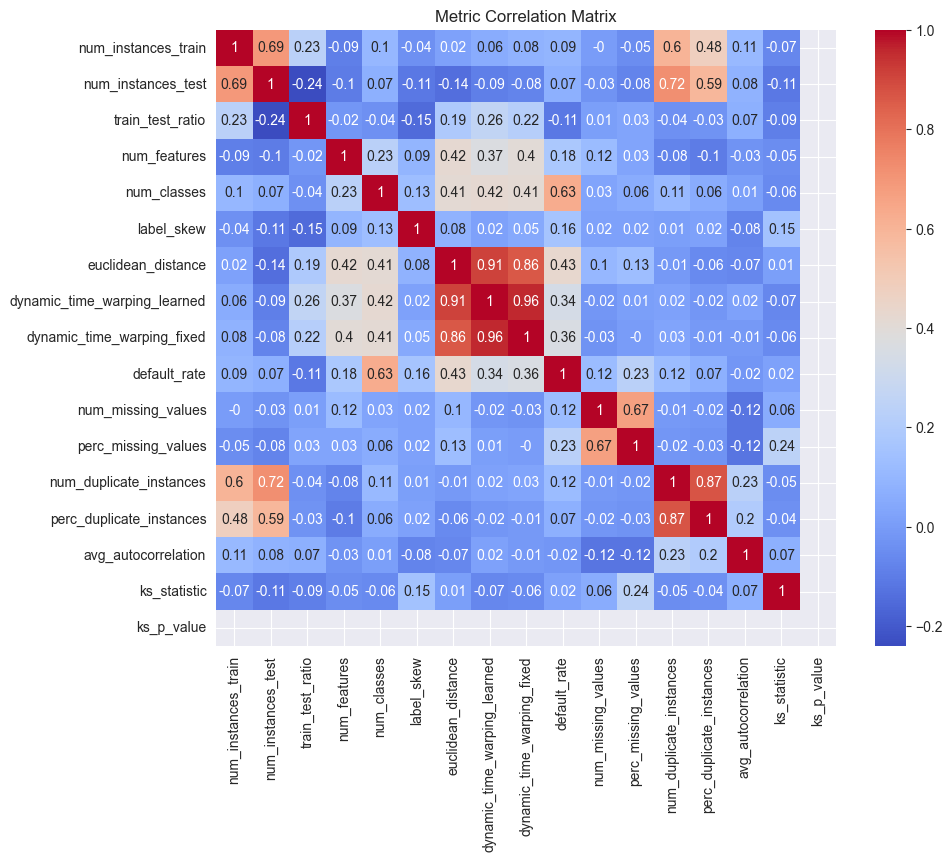

Count of data sets in each category:
-1 to -0.5: 0
-0.49 to -0.01: 90
0: 4
0.01 to 0.49: 126
0.5 to 1: 36
Total Sum: 256


In [5]:
# drop dataset name column
df_without_dataset_name = df.drop('dataset_name', axis=1)

# create correlation matrix
correlation_matrix = df_without_dataset_name.corr().round(2)

# change figure size
plt.figure(figsize=(10, 8)) # width, height

# plot heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Metric Correlation Matrix')
plt.show()

# Count of values for each category
count_neg_1_to_neg_0_5 = ((correlation_matrix >= -1) & (correlation_matrix <= -0.5)).sum().sum()
count_neg_0_49_to_neg_0_01 = ((correlation_matrix >= -0.49) & (correlation_matrix <= -0.01)).sum().sum()
count_0 = ((correlation_matrix > -0.01) & (correlation_matrix < 0.01)).sum().sum()
count_0_01_to_0_49 = ((correlation_matrix >= 0.01) & (correlation_matrix <= 0.49)).sum().sum()
count_0_5_to_1 = ((correlation_matrix >= 0.5) & (correlation_matrix <= 1)).sum().sum()

# Total sum of counts
total_count = count_neg_1_to_neg_0_5 + count_neg_0_49_to_neg_0_01 + count_0 + count_0_01_to_0_49 + count_0_5_to_1

# Print the counts
print("Count of data sets in each category:")
print("-1 to -0.5: {}".format(count_neg_1_to_neg_0_5))
print("-0.49 to -0.01: {}".format(count_neg_0_49_to_neg_0_01))
print("0: {}".format(count_0))
print("0.01 to 0.49: {}".format(count_0_01_to_0_49))
print("0.5 to 1: {}".format(count_0_5_to_1))

# Print the total sum
print("Total Sum: {}".format(total_count))

# Histograms

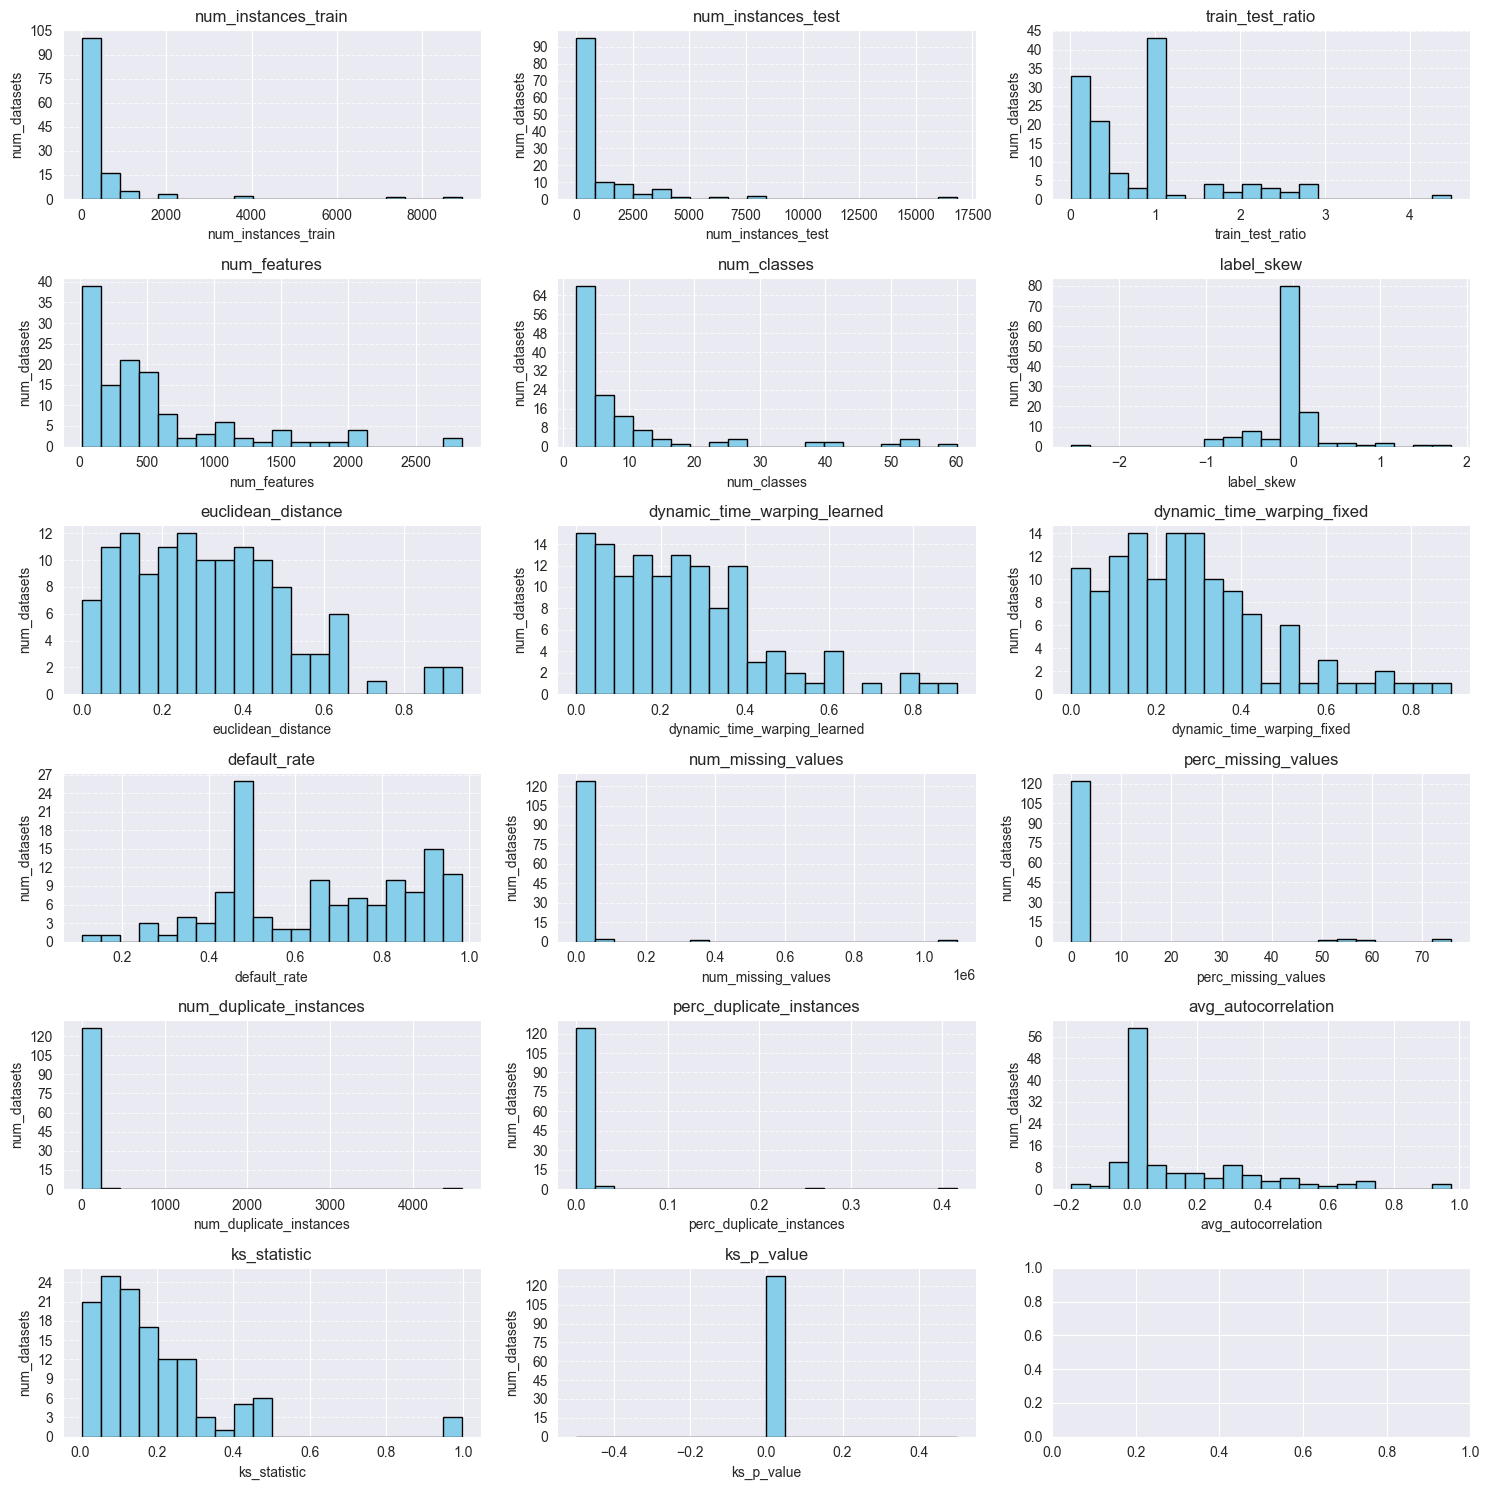

In [11]:
feature_columns = ['num_instances_train', 'num_instances_test', 'train_test_ratio', 'num_features', 'num_classes', 'label_skew', 'euclidean_distance', 'dynamic_time_warping_learned', 'dynamic_time_warping_fixed', 'default_rate', 'num_missing_values', 'perc_missing_values', 'num_duplicate_instances', 'perc_duplicate_instances', 'avg_autocorrelation', 'ks_statistic', 'ks_p_value']

# round train_test_ratio to 2 decimal places
df['train_test_ratio'] = df['train_test_ratio'].astype(float).round(2)

# Set the number of columns for subplots
num_columns = 3
num_rows = (len(feature_columns) + num_columns - 1) // num_columns

# Create subplots
fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 15))

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot histograms for each feature in subplots
for i, feature in enumerate(feature_columns):
    axes[i].hist(df[feature], bins=20, color='skyblue', edgecolor='black')
    axes[i].set_title(f'{feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('num_datasets')
    axes[i].yaxis.set_major_locator(plt.MaxNLocator(integer=True))  # Set y-axis ticks to integers
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

# Box Plots

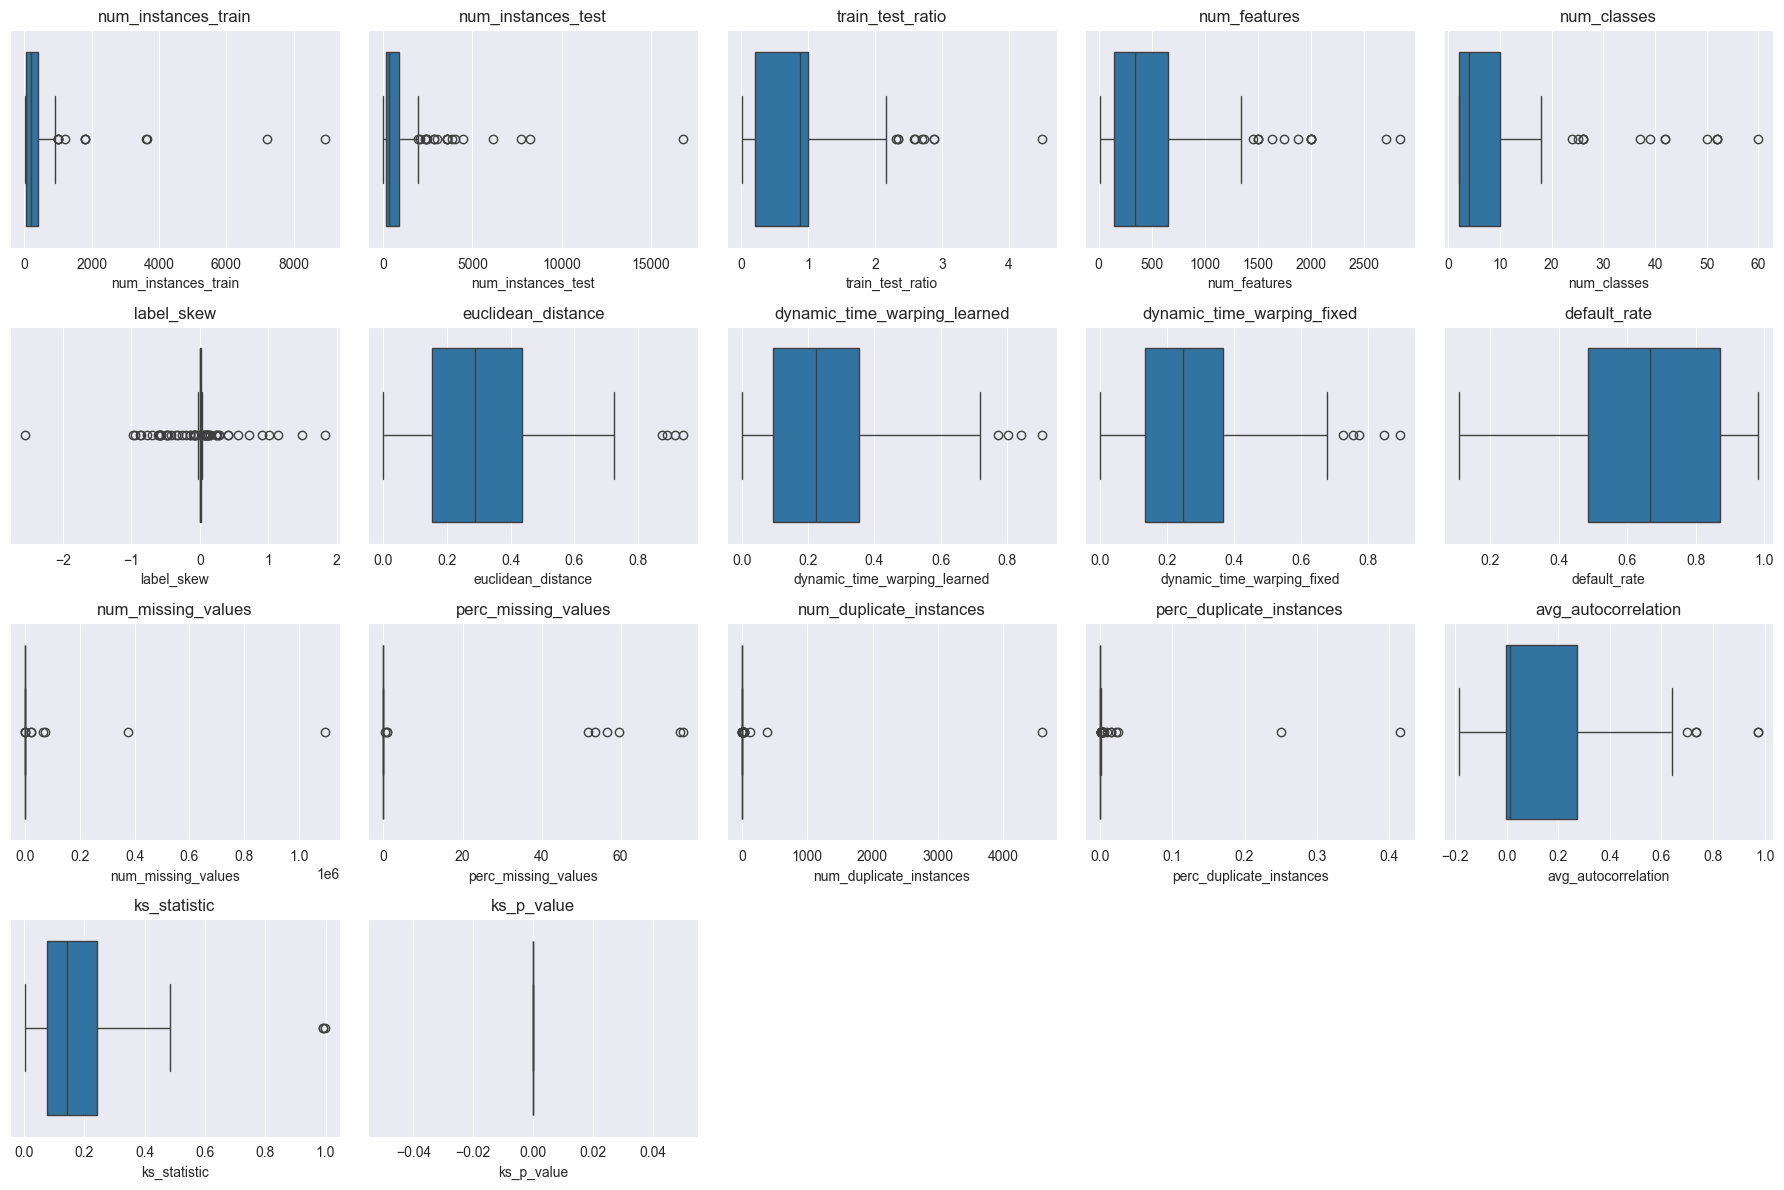

In [15]:
plt.figure(figsize=(18, 12))
for i, column in enumerate(feature_columns, 1):
    plt.subplot(4, 5, i)
    ax = sns.boxplot(x=df[column])

    # Identify outliers using the IQR method
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR)))

    plt.title(f'{column}')

plt.tight_layout()
plt.show()

# Scatter Plots

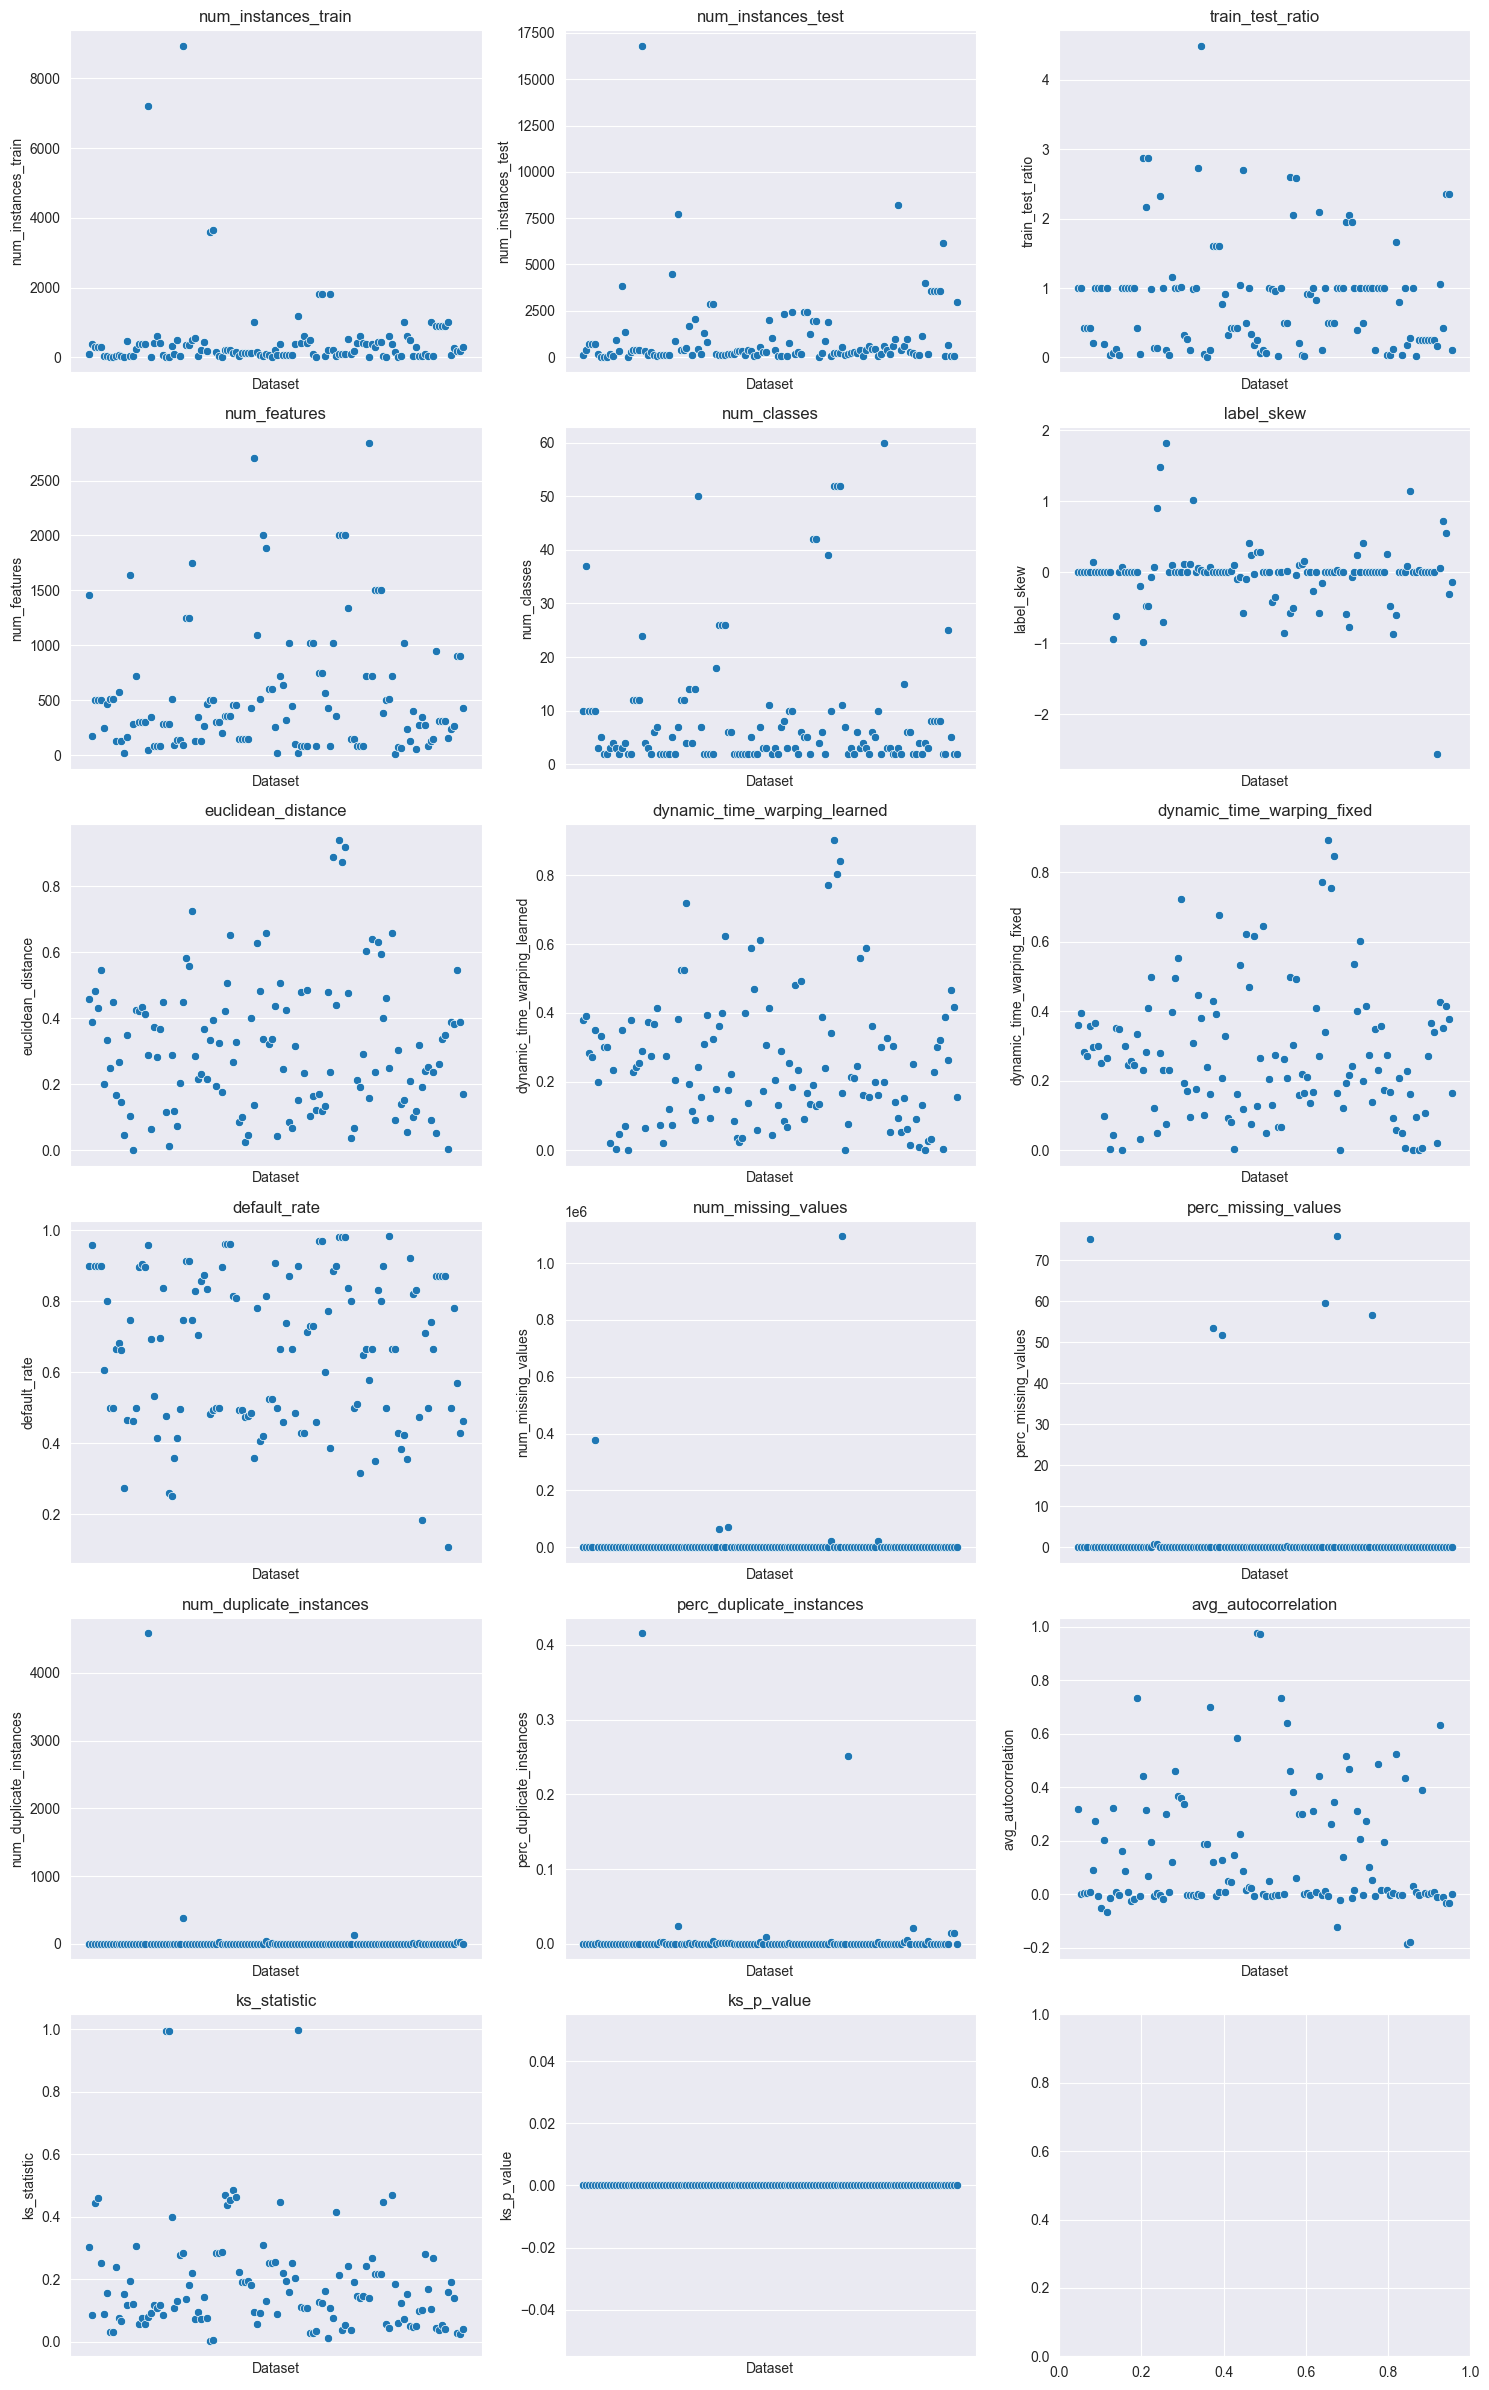

In [16]:
# Number of features (excluding the dataset_name column)
num_features = len(df.columns) - 1

# Calculate the number of rows and columns needed for the subplots
num_cols = 3
num_rows = math.ceil(num_features / num_cols)

# Create a grid of subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 4 * num_rows))

# Flatten the axes array to simplify indexing
axes = axes.flatten()

# Iterate through the features and create scatter plots
for i, feature in enumerate(df.columns[1:]):  # Skip the dataset_name column
    ax = axes[i]

    # Create scatter plot
    sns.scatterplot(data=df, x='dataset_name', y=feature, ax=ax)

    # Identify outliers using the IQR method
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((df[feature] < (Q1 - 1.5 * IQR)) | (df[feature] > (Q3 + 1.5 * IQR)))

    # Remove x-axis labels
    ax.set_xticks([])
    ax.set_xticklabels([])

    # Set x-axis label
    ax.set_xlabel('Dataset')

    ax.set_title(f'{feature}')
    ax.set_ylabel(feature)

# Adjust layout for readability
plt.tight_layout()
plt.show()

# Calculate normal ranges for each feature and print the percentage of outlier datasets

In [18]:
import pandas as pd

total_samples = len(df)
result_data = []

for column in feature_columns:
    Q1, Q3 = df[column].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR

    if column.startswith("num_") or column.startswith("perc_") or column.startswith("train_") or column.startswith("ks_"):
        lower_bound = df[column].min()

    upper_bound = Q3 + 1.5 * IQR
    amount_outliers = ((df[column] < lower_bound) | (df[column] > upper_bound)).sum()
    percentage_outliers = (amount_outliers / total_samples) * 100

    lower_bound_str = int(round(lower_bound, 0)) if column.startswith("num_") else round(lower_bound, 4)
    upper_bound_str = int(round(upper_bound, 0)) if column.startswith("num_") else round(upper_bound, 4)

    result_data.append({
        'Feature': column,
        'Normal Range': f'{lower_bound_str} to {upper_bound_str}',
        'Percentage of Outlier Datasets': round(percentage_outliers, 2)
    })

result_df = pd.DataFrame(result_data)
print(result_df)

                         Feature       Normal Range   
0            num_instances_train          16 to 919  \
1             num_instances_test         20 to 1968   
2               train_test_ratio      0.01 to 2.185   
3                   num_features         15 to 1428   
4                    num_classes            2 to 22   
5                     label_skew  -0.0282 to 0.0367   
6             euclidean_distance  -0.2714 to 0.8582   
7   dynamic_time_warping_learned  -0.2936 to 0.7408   
8     dynamic_time_warping_fixed   -0.2135 to 0.714   
9                   default_rate  -0.0933 to 1.4505   
10            num_missing_values             0 to 0   
11           perc_missing_values         0.0 to 0.0   
12       num_duplicate_instances             0 to 2   
13      perc_duplicate_instances      0.0 to 0.0005   
14           avg_autocorrelation   -0.417 to 0.6881   
15                  ks_statistic    0.003 to 0.4944   
16                    ks_p_value         0.0 to 0.0   

    Perce